# Covid in Ontario Canada

The following analysis uses data published by the Government of Ontario.

https://data.ontario.ca/

At some point during the pandemic I started feeling like news outlets were not reporting on the things I cared about.  I care about numbers and actual data, not some news outlets interpretation.  Even worse is editorialized content that always puts a spin on the data to push an agenda.  I don't care about any of that, I just want to know what is going on.

The best way to do this is to download the data yourself and analyse it.  Even if you don't know programming you could easily import this data into Excel and do something similar.

Since I am a python hobbyist this feels like a great use case for Python Pandas, Matplotlib and Seaborn for visualizations.

I did my best to interpret the data in an unbiased way.  However, its easy to make mistakes and if you see something that doesnt make sense or you don't agree with please drop me an email, I would like to hear from you.

You can reach out to me at alaudet@linuxnorth.org

Feedback is always welcome.

## Load the libraries

In [1]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")

## Import the data

In [2]:
# Dataset #1 - Covid Cases in Ontario
df = pd.read_csv('../data/conposcovidloc.csv', index_col="Row_ID")
# The conposcovidloc.csv file is over 100Mb. 
# If you prefer to download it directly from the source, use this instead;
# df = pd.read_csv('https://data.ontario.ca/dataset/f4112442-bdc8-45d2-be3c-12efae72fb27/resource/455fd63b-603d-4608-8216-7d8647f43350/download/conposcovidloc.csv', index_col="Row_ID")

# schema_df source: https://data.ontario.ca/dataset/f4112442-bdc8-45d2-be3c-12efae72fb27/resource/a2ea0536-1eae-4a17-aa04-e5a1ab89ca9a/download/conposcovidloc_data_dictionary.xlsx
# converted from xlsx to csv and available on linuxnorth.org
schema_df = pd.read_csv('https://www.linuxnorth.org/pandas/data/conposcovidloc_data_dictionary.csv', index_col="Variable Name", encoding = "ISO-8859-1", error_bad_lines=False)


# Dataset #2 - Covid Retransmission Rate in Ontario
dfre = pd.read_csv('https://data.ontario.ca/dataset/8da73272-8078-4cbd-ae35-1b5c60c57796/resource/1ffdf824-2712-4f64-b7fc-f8b2509f9204/download/re_estimates_on.csv')

# Dataset #3 - Vaccine data for Ontario
dfvaccine = pd.read_csv('https://data.ontario.ca/dataset/752ce2b7-c15a-4965-a3dc-397bf405e7cc/resource/8a89caa9-511c-4568-af89-7f2174b4378c/download/vaccine_doses.csv')

# Dataset 1 Analysing Covid in Ontario

In [3]:
# taking a peek
df.head(1)

,Accurate_Episode_Date,Case_Reported_Date,Test_Reported_Date,Specimen_Date,Age_Group,Client_Gender,Case_AcquisitionInfo,Outcome1,Outbreak_Related,Reporting_PHU_ID,Reporting_PHU,Reporting_PHU_Address,Reporting_PHU_City,Reporting_PHU_Postal_Code,Reporting_PHU_Website,Reporting_PHU_Latitude,Reporting_PHU_Longitude
Row_ID,,,,,,,,,,,,,,,,,
1,2020-04-18,2020-04-21,2020-04-21,2020-04-20,30s,FEMALE,CC,Resolved,NaN,2236,Halton Region Health Department,1151 Bronte Road,Oakville,L6M 3Ll,www.halton.ca/For-Residents/Public-Health/,43.413997,-79.744796


In [4]:
# Dataframe size (rows, columns)
df.shape

(544414, 17)

In [5]:
# Looking at the schema provided
schema_df = schema_df[['Definition', 'Additional Notes']]
schema_df.sort_index(inplace=True)
schema_df

,Definition,Additional Notes
Variable Name,,
Accurate_Episode_Date,The field uses a number of dates entered in th...,Blank records may exist where a Public Health ...
Age_Group,Age group of the patient.,Patient ages are clustered in 10-year interval...
Case_AcquisitionInfo,"Suspected method of exposure to COVID-19, if k...","As of June 17, 2020, values include: CC (clo..."
Case_Reported_Date,The date that the case was reported to the loc...,NaN
Client_Gender,Gender information of the patient.,"Values Include: 'FEMALE', 'MALE', 'GENDER DIV..."
Outbreak_Related,Describes whether a confirmed positive case is...,A confirmed positive case that is associated w...
Outcome1,Patient outcome.,"Values include: Resolved, Not Resolved, Fatal."
Reporting_PHU,Public Health Unit (PHU) where confirmed posit...,"For a list of Ontario's Public Health Units, p..."
Reporting_PHU_Address,Official physical street address of Public Hea...,This variable does not indicate the specfic ph...


In [6]:
# How many missing values in each column
df.isna().sum()

Accurate_Episode_Date             0
Case_Reported_Date                0
Test_Reported_Date            12458
Specimen_Date                  2266
Age_Group                         0
Client_Gender                     0
Case_AcquisitionInfo              0
Outcome1                          0
Outbreak_Related             451766
Reporting_PHU_ID                  0
Reporting_PHU                     0
Reporting_PHU_Address             0
Reporting_PHU_City                0
Reporting_PHU_Postal_Code         0
Reporting_PHU_Website             0
Reporting_PHU_Latitude            0
Reporting_PHU_Longitude           0
dtype: int64

In [7]:
# Looking only at columns of interest
columns_of_interest = ['Accurate_Episode_Date', 'Case_Reported_Date', 'Age_Group', 'Client_Gender', 'Case_AcquisitionInfo', 
                       'Outcome1', 'Outbreak_Related', 'Reporting_PHU_ID', 'Reporting_PHU']
df = df[columns_of_interest]
df.columns = ['adate','rdate', 'age', 'gender', 'source', 'outcome', 'outbreak', 'phuid', 'phu']

In [8]:
df.dtypes

adate       object
rdate       object
age         object
gender      object
source      object
outcome     object
outbreak    object
phuid        int64
phu         object
dtype: object

In [9]:
# Dates are stored as strings. Change them to pandas datetime
df['rdate']= pd.to_datetime(df['rdate'])
df['adate']= pd.to_datetime(df['adate'])

In [10]:
df.dtypes

adate       datetime64[ns]
rdate       datetime64[ns]
age                 object
gender              object
source              object
outcome             object
outbreak            object
phuid                int64
phu                 object
dtype: object

In [11]:
# Take another peek....that's better
df.head()

,adate,rdate,age,gender,source,outcome,outbreak,phuid,phu
Row_ID,,,,,,,,,
1,2020-04-18,2020-04-21,30s,FEMALE,CC,Resolved,NaN,2236,Halton Region Health Department
2,2020-04-01,2020-04-20,50s,MALE,CC,Resolved,NaN,2236,Halton Region Health Department
3,2020-04-07,2020-04-11,80s,FEMALE,OB,Fatal,Yes,2236,Halton Region Health Department
4,2020-04-11,2020-04-12,60s,MALE,OB,Fatal,Yes,2253,Peel Public Health
5,2020-03-30,2020-04-08,50s,MALE,CC,Resolved,NaN,2236,Halton Region Health Department


In [12]:
# Total number of covid cases reported in Ontario all time.
len(df)

544414

In [13]:
# Change '<20' to '0-19'.  This will make age distribution charts easier to read later.
df['age'] = df['age'].replace(['<20'],'0-19')
df.head(2)

,adate,rdate,age,gender,source,outcome,outbreak,phuid,phu
Row_ID,,,,,,,,,
1,2020-04-18,2020-04-21,30s,FEMALE,CC,Resolved,NaN,2236,Halton Region Health Department
2,2020-04-01,2020-04-20,50s,MALE,CC,Resolved,NaN,2236,Halton Region Health Department


## Case distribution by date since the beginning of the pandemic

We can see three distinct waves of covid spread in Ontario.  The initial smaller wave at the beginning that devastated the elderly in March/April of 2020, then two distinct larger waves in January and May 2021 which was mostly spread by younger people.

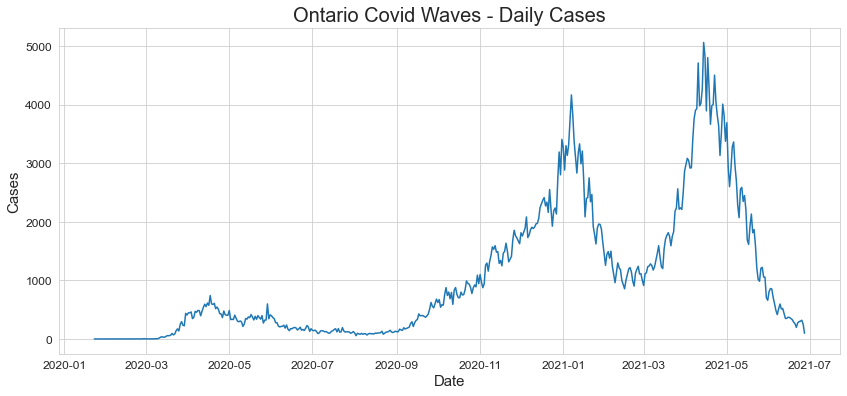

In [14]:
plt.figure(figsize=(14,6))
plt.title('Ontario Covid Waves - Daily Cases', fontsize=20)
sns.lineplot(data=df['rdate'].value_counts())
plt.ylabel('Cases', fontsize=15)
plt.xlabel('Date', fontsize=15)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.show()

## Gender breakdown of Covid Cases in Ontario

Covid infects all genders proportionally.

MALE              271255
FEMALE            269372
UNSPECIFIED         3754
GENDER DIVERSE        33
Name: gender, dtype: int64


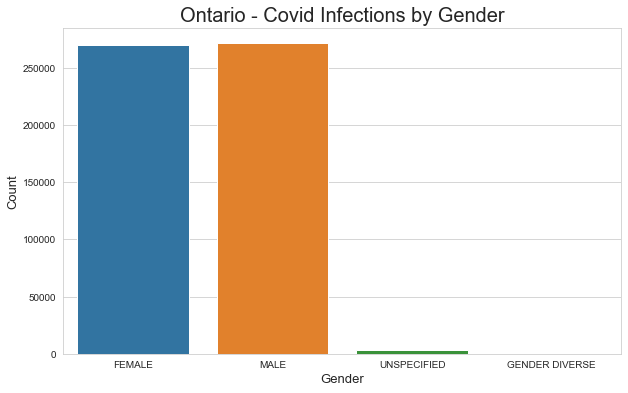

In [15]:
print(df['gender'].value_counts())
gender_filter = (df["gender"] == 'MALE') | (df["gender"] == 'FEMALE') | (df["gender"] == 'UNSPECIFIED') | (df["gender"] == 'GENDER DIVERSE')
gdf = df[gender_filter]
plt.figure(figsize=(10,6))
plt.title("Ontario - Covid Infections by Gender", fontsize=20)
sns.countplot(x=gdf["gender"], data=df)
plt.xlabel('Gender', fontsize=13)
plt.ylabel('Count', fontsize=13)
plt.show()

## Region specific covid cases

My hometown is Timmins and I am originally from Sudbury.  Let's compare the two communities covid cases.  Timmins is represented by the Porcupine Health Unit area.

The Porcupine Health Unit area had an explosion of cases in May, especially in the James Bay area.

You can compare multiple areas easily.

In [16]:
df_tim = df[df.phu == "Porcupine Health Unit"]
df_sud = df[df.phu == "Sudbury & District Health Unit"]

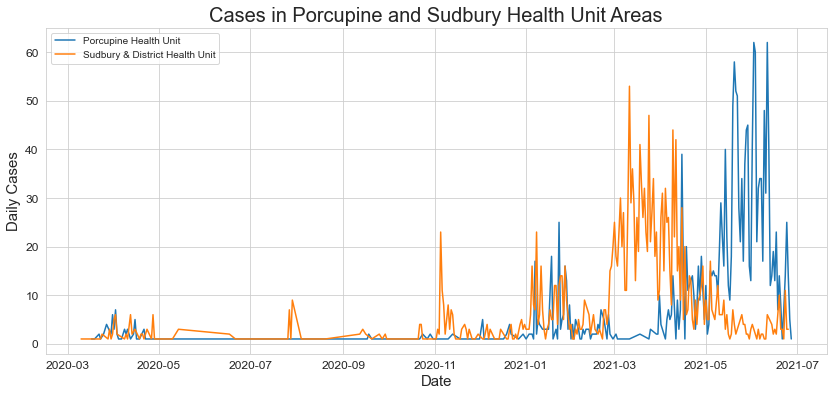

In [17]:
plt.figure(figsize=(14,6))
plt.title('Cases in Porcupine and Sudbury Health Unit Areas', fontsize=20)
plt.xlabel("Date", fontsize=15)
plt.ylabel("Daily Cases", fontsize=15)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
sns.lineplot(data=df_tim['rdate'].value_counts(), label="Porcupine Health Unit")
sns.lineplot(data=df_sud['rdate'].value_counts(), label="Sudbury & District Health Unit")
plt.show()

## Distribution of cases by age group

We can see that young people have been hit especially hard by Covid.

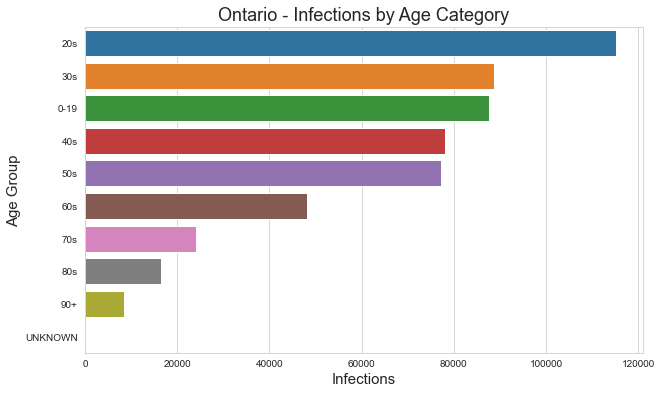

In [18]:
plt.figure(figsize=(10,6))
plt.title("Ontario - Infections by Age Category", fontsize=18)
sns.countplot(data=df, y=df['age'],order=df["age"].value_counts().index)#.iloc[:10].index)
plt.ylabel('Age Group', fontsize=15)
plt.xlabel('Infections', fontsize=15)
plt.show()

## Tracking age distribution of infections during the three Ontario covid waves.

Note: These dates are approximate by looking at the Ontario cases graph higher up. 

* Wave 1 - March to May 2020
* Wave 2 - October 2020 to February 2021
* Wave 3 - April 2021 to May 2021

In [19]:
wave1 = (df['rdate'] > '2020-03-01') & (df['rdate'] < '2020-05-30')
wave2 = (df['rdate'] > '2020-10-01') & (df['rdate'] < '2021-02-28')
wave3 = (df['rdate'] > '2021-04-01') & (df['rdate'] < '2021-05-21')

dfwave1 = df[wave1].sort_values(by='age')
dfwave2 = df[wave2].sort_values(by='age')
dfwave3 = df[wave3].sort_values(by='age')

### Age trends

We can see a clear trend of age distributions moving towards younger generations with each wave.  There is a lot of speculation and people are quick to criticize younger Canadians for not following Covid guidelines like social distancing and not gathering in groups.  I don't think that is entirely fair as Ontario has been proritizing older Ontarians during vaccine rollout.

Also more virulent variants have taken hold and many young Canadians work in the service sector, therefore may not have the luxury of working from home.  They have no choice but to get out there.  

Also as we see in the last wave "under 20's" have  not had access to vaccination in the -12 years old group.  The under 30 group now account for almost three quarters of new cases.

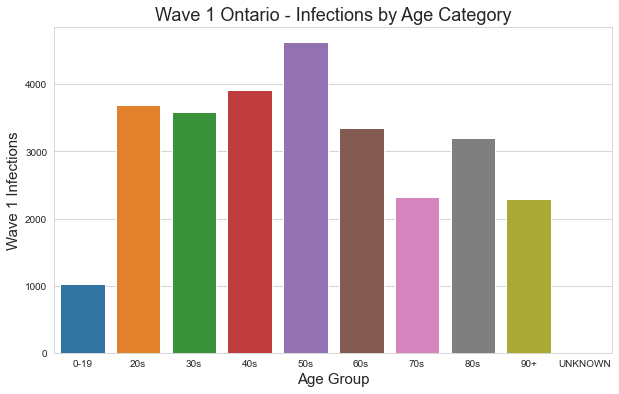

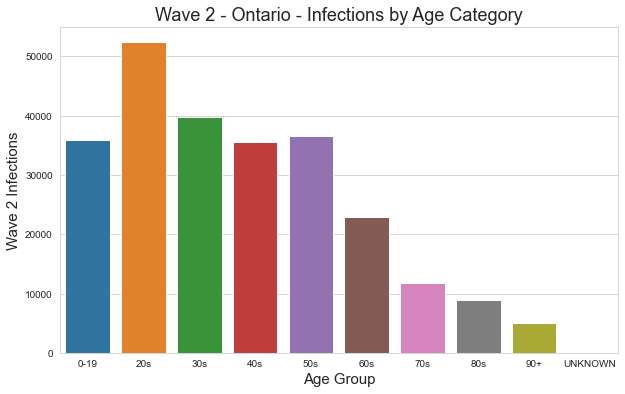

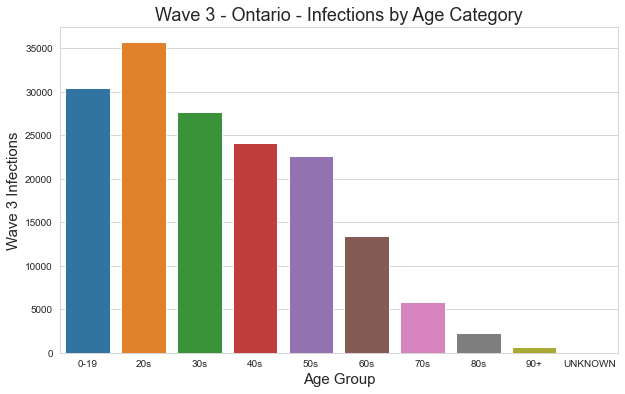

In [65]:
# wave 1 graph
plt.figure(figsize=(10,6))
plt.title("Wave 1 Ontario - Infections by Age Category", fontsize=18)
sns.countplot(data=dfwave1, x='age')
plt.xlabel('Age Group', fontsize=15)
plt.ylabel('Wave 1 Infections', fontsize=15)

# wave 2 graphb
plt.figure(figsize=(10,6))
plt.title("Wave 2 - Ontario - Infections by Age Category", fontsize=18)
sns.countplot(data=dfwave2, x='age')
plt.xlabel('Age Group', fontsize=15)
plt.ylabel('Wave 2 Infections', fontsize=15)

# wave 3 graph
plt.figure(figsize=(10,6))
plt.title("Wave 3 - Ontario - Infections by Age Category", fontsize=18)
sns.countplot(data=dfwave3, x='age')
plt.xlabel('Age Group', fontsize=15)
plt.ylabel('Wave 3 Infections', fontsize=15)

plt.show()

In [89]:
df.age.value_counts().sort_index()

0-19        87581
20s        115193
30s         88628
40s         78077
50s         77158
60s         48169
70s         24048
80s         16437
90+          8576
UNKNOWN       102
Name: age, dtype: int64

## Look at how the different age categories are getting infected by Covid 19.

Missing Information and Unspecified EPI Link have been ommitted


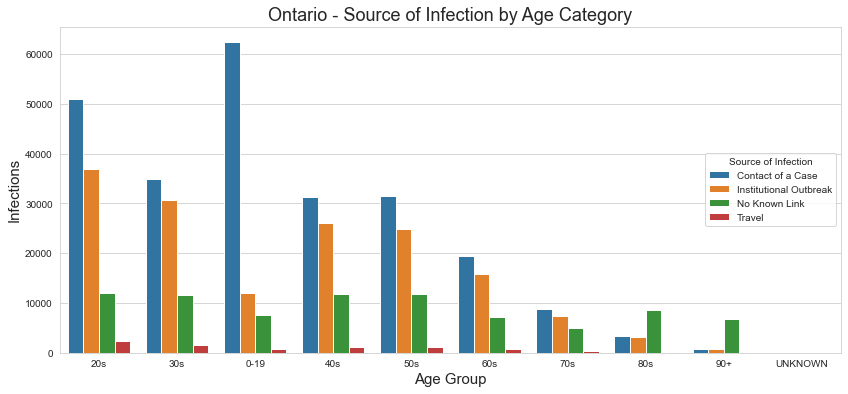

In [94]:
print('Missing Information and Unspecified EPI Link have been ommitted')
plt.figure(figsize=(14,6))
plt.title("Ontario - Source of Infection by Age Category", fontsize=18)
sns.countplot(data=df, x='age', hue='source', hue_order=('CC', 'NO KNOWN EPI LINK',
                                                         'OB', 'TRAVEL'), order=df.age.value_counts().index)
plt.legend(title='Source of Infection', loc=7,labels=('Contact of a Case', 'Institutional Outbreak',
                                              'No Known Link', 'Travel', 'Missing Information', 'Unspecified Link'))
plt.xlabel('Age Group', fontsize=15)
plt.ylabel('Infections', fontsize=15)
plt.show()

# Tracking Deaths

The risk of death from Covid rises exponentially as we age.  Despite most infections occurring in younger Ontarians, the elderly have suffered the most deaths.

0-19          4
20s          25
30s          57
40s         129
50s         434
60s        1036
70s        1854
80s        3130
90+        2448
UNKNOWN       1
Name: age, dtype: int64


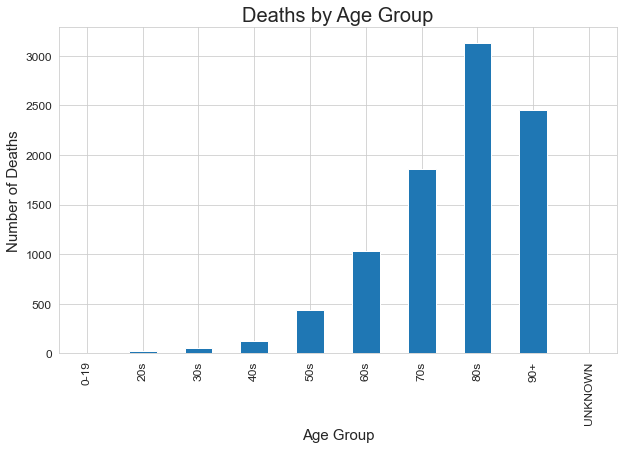

In [100]:
dfdeath = df[df.outcome == 'Fatal'].age.value_counts().sort_index()
print(dfdeath)
plt.figure(figsize=(10,6))
plt.title('Deaths by Age Group', fontsize=20)
plt.ylabel('Number of Deaths', fontsize=15)
plt.xlabel('Age Group', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
dfdeath.plot(kind='bar')
#sns.countplot(data=df, x='age', hue='outcome', hue_order=['Fatal'], order=df.age.value_counts().index)
plt.show()

## Death by time period

With well over 9000 deaths in Ontario since the beginning of the Covid pandemic, the vast majority have been in individuals over 70 years of age.  Despite the increasing number of cases throughout the second and third wave, deaths have dropped dramatically as infections moved to younger individuals, who are less susceptible to death as a result of infection.

Vaccination is also contributing to decreased rates of death.

In [22]:
df_fatal = df[df.outcome == 'Fatal'].sort_index()
df_fatal = df_fatal.sort_values(by=['rdate'])
print('There have been',len(df_fatal), 'Deaths Total.')

There have been 9129 Deaths Total.


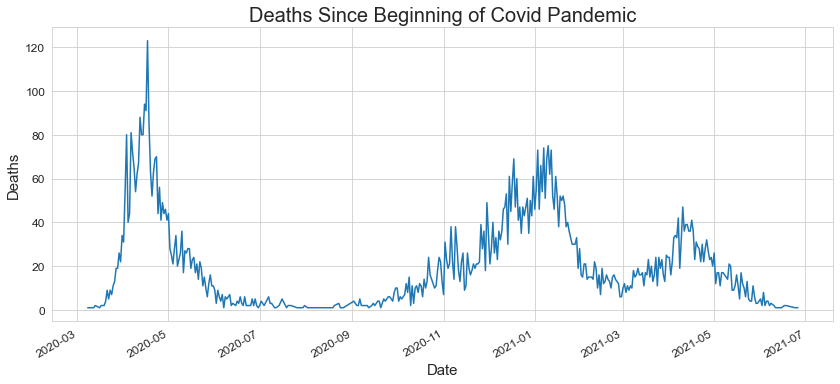

In [23]:
plt.figure(figsize=(14,6))
plt.title('Deaths Since Beginning of Covid Pandemic', fontsize=20)
plt.ylabel('Deaths', fontsize=15)
plt.xlabel('Date', fontsize=15)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
df_fatal['rdate'].value_counts().plot()
plt.show()

In [24]:
df['outcome'].unique()

array(['Resolved', 'Fatal', 'Not Resolved'], dtype=object)

In [25]:
df['outcome'].value_counts()

Resolved        532779
Fatal             9129
Not Resolved      2506
Name: outcome, dtype: int64

## The hardest hit regions in Ontario

No surprise that large urban centres had the highest rates of transmission

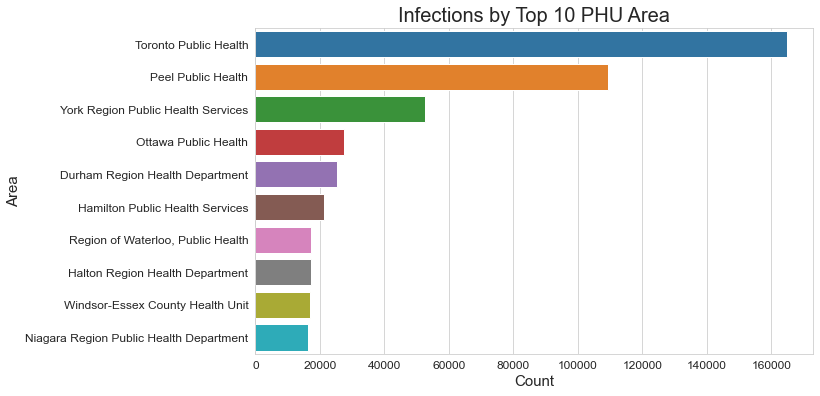

In [26]:
plt.figure(figsize=(10,6))
plt.title("Infections by Top 10 PHU Area", fontsize=20)
sns.countplot(data=df, y=df['phu'], order=df.phu.value_counts().iloc[:10].index)
plt.ylabel('Area', fontsize=15)
plt.xlabel('Count', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# 2. Effective reproduction number (Re) for COVID-19 in Ontario 

An estimate of the average number of people 1 person will infect when they have COVID-19. 

Source: https://data.ontario.ca/dataset/effective-reproduction-number-re-for-covid-19-in-ontario

Note: A rate over one will mean that covid numbers are on the rise.  A rate below one means Covid cases are shrinking.

In [27]:
dfre.head()

,region,date_start,date_end,Re,lower_CI,upper_CI
0,Ontario,2020-03-13,2020-03-19,3.02,2.67,3.40
1,Ontario,2020-03-14,2020-03-20,2.75,2.47,3.06
2,Ontario,2020-03-15,2020-03-21,2.59,2.35,2.85
3,Ontario,2020-03-16,2020-03-22,2.39,2.19,2.61
4,Ontario,2020-03-17,2020-03-23,2.27,2.09,2.46


In [28]:
# Make date_start and date_end Pandas datetime objects instead of strings.
dfre['date_start'] = pd.to_datetime(dfre['date_start'])
dfre['date_end'] = pd.to_datetime(dfre['date_end'])

In [29]:
dfre.dtypes

region                object
date_start    datetime64[ns]
date_end      datetime64[ns]
Re                   float64
lower_CI             float64
upper_CI             float64
dtype: object

### Create a Baseline Re rate of 1

In [30]:
dfre['Re_baseline'] = dfre.apply(lambda x: 1, axis=1)

### Set date_end as the index of the dataframe.  

The Re number is provided as a rolling average of the past 7 days in Ontario's data.

In [31]:
dfre.set_index('date_end', inplace=True)

In [32]:
dfre.tail()

,region,date_start,Re,lower_CI,upper_CI,Re_baseline
date_end,,,,,,
2021-06-18,Ontario,2021-06-12,0.79,0.76,0.82,1
2021-06-19,Ontario,2021-06-13,0.78,0.75,0.81,1
2021-06-20,Ontario,2021-06-14,0.77,0.74,0.80,1
2021-06-21,Ontario,2021-06-15,0.76,0.73,0.79,1
2021-06-22,Ontario,2021-06-16,0.78,0.75,0.81,1


### Re rate observations

The Re rate can be a powerful predictor of where we are headed in terms of an increasing or decreasing number of cases.  Vaccination of Ontarians started in February and has really picked up steam in April, May and June.  The Re rate seems to reflect this and has been on a continuous decline since April.  However it may still be too early to tell for sure with the Delta variant taking hold.

We see a similar trend from January to the end of February before the third wave hit. Vaccination was not an issue at that time.

It will be interesting to follow the Re rate in the next months given high vaccination rates but also increased spread of the Delta variant (and future unknown variants). If vaccination manages to contain Re then we can get ahead of Covid and return to a more normal way of life.  The wildcard in this will be variants.  While vaccination appears to be working with current strains, new variants could take hold and push Re back up again resulting in more waves.  

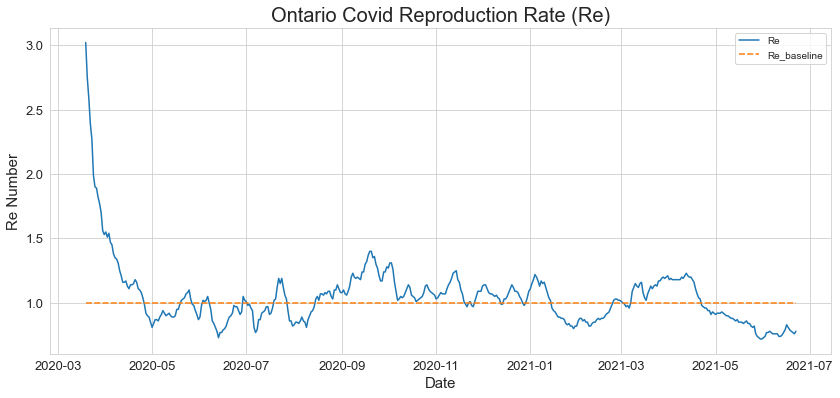

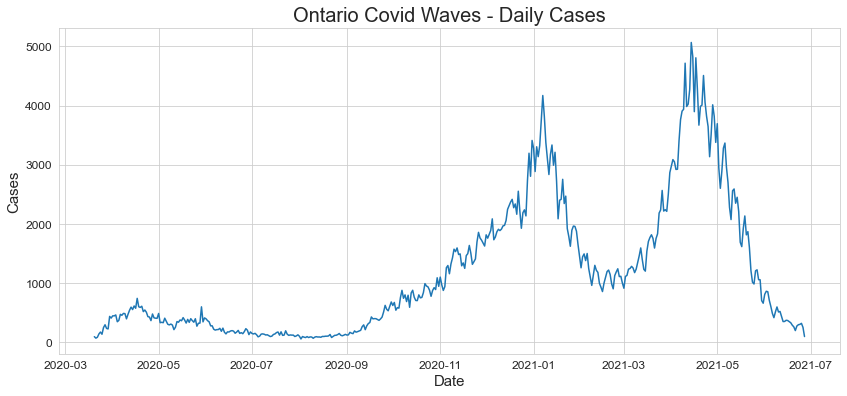

In [33]:
# Re Graph
plt.figure(figsize=(14, 6))
plt.title("Ontario Covid Reproduction Rate (Re)", fontsize=20)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
sns.lineplot(data=dfre[['Re', 'Re_baseline']])
plt.xlabel("Date", fontsize=15)
plt.ylabel("Re Number", fontsize=15)

# Ontario Covid Case graph for comparison.  

#Let's lineup the dates with the Re dataset first.
df = df[df['rdate'] > '2020-03-19']

plt.figure(figsize=(14,6))
plt.title('Ontario Covid Waves - Daily Cases', fontsize=20)
sns.lineplot(data=df['rdate'].value_counts())
plt.ylabel('Cases', fontsize=15)
plt.xlabel('Date', fontsize=15)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.show()

# Vaccination Analysis

The following looks at vaccination rates in Ontario.  We can see that Ontarians overall are being vaccinated in large numbers.  As of June 27, 2021 we have not yet seen a plateau although rates are expected to slow down.

In [34]:
dfvaccine.tail()

,report_date,previous_day_total_doses_administered,previous_day_at_least_one,previous_day_fully_vaccinated,total_doses_administered,total_individuals_at_least_one,total_doses_in_fully_vaccinated_individuals,total_individuals_fully_vaccinated
178,2021-06-25,246393.0,27611.0,218782.0,13568209,9806988.0,7522442.0,3761221.0
179,2021-06-26,256260.0,29376.0,226884.0,13824469,9836364.0,7976210.0,3988105.0
180,2021-06-27,202672.0,27156.0,175516.0,14027141,9863520.0,8327242.0,4163621.0
181,2021-06-28,180369.0,19220.0,161149.0,14207510,9882740.0,8649540.0,4324770.0
182,2021-06-29,265231.0,26532.0,238699.0,14472741,9909272.0,9126938.0,4563469.0


In [35]:
# Create a 7 day rolling average column of daily vaccinations.
dfvaccine['7day'] = dfvaccine.iloc[:,1].rolling(window=7).mean()

In [36]:
dfvaccine[['previous_day_total_doses_administered', '7day']].tail(10)

,previous_day_total_doses_administered,7day
173,184251.0,191754.714286
174,118625.0,189333.428571
175,199535.0,191411.428571
176,227318.0,194887.714286
177,225188.0,196970.142857
178,246393.0,202078.000000
179,256260.0,208224.285714
180,202672.0,210855.857143
181,180369.0,219676.428571
182,265231.0,229061.571429


In [37]:
# Make report_date a pandas datetime object instead of a string.
dfvaccine['report_date'] = pd.to_datetime(dfvaccine['report_date'])
dfvaccine.dtypes

report_date                                    datetime64[ns]
previous_day_total_doses_administered                 float64
previous_day_at_least_one                             float64
previous_day_fully_vaccinated                         float64
total_doses_administered                                int64
total_individuals_at_least_one                        float64
total_doses_in_fully_vaccinated_individuals           float64
total_individuals_fully_vaccinated                    float64
7day                                                  float64
dtype: object

### Interesting to see that numbers really drop on Sundays as Monday reporting always shows lower numbers

Text(0, 0.5, 'Number Vaccinated')

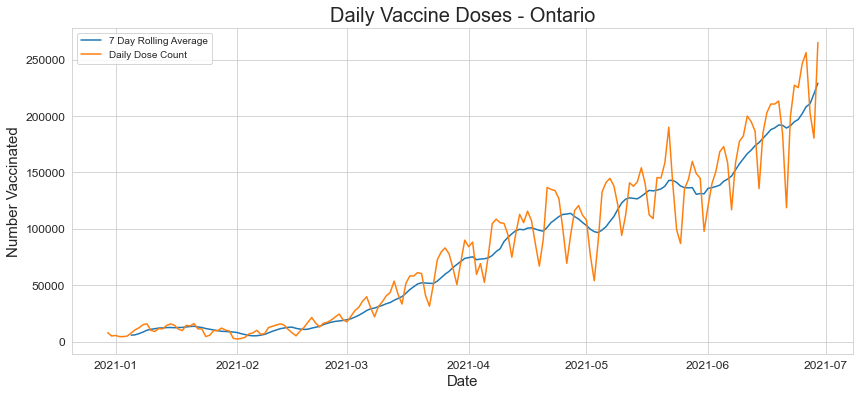

In [38]:
plt.figure(figsize=(14,6))
plt.title('Daily Vaccine Doses - Ontario', fontsize=20)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
sns.lineplot(data=dfvaccine, x='report_date', y='7day', label='7 Day Rolling Average')
sns.lineplot(data=dfvaccine, x='report_date', y='previous_day_total_doses_administered', label='Daily Dose Count')
plt.xlabel('Date',fontsize=15)
plt.ylabel('Number Vaccinated',fontsize=15)

In [39]:
dfvaccine.set_index('report_date', inplace=True)

In [40]:
total_doses = dfvaccine['previous_day_total_doses_administered'].sum()
total_fully_vaccinated = dfvaccine['total_individuals_fully_vaccinated'].max()
total_first_doses = total_doses - total_fully_vaccinated
population = 14570000
vaccine_rate = (total_first_doses / population) * 100
full_vaccine_rate = (total_fully_vaccinated / population) * 100
unvaccinated = round(((population - dfvaccine['total_individuals_at_least_one'].max()) / population) * 100,1)

In [41]:
print('Fast Sheet')
print("----------")
print("Data Published:", str(dfvaccine.index[-1])[0:10])

print("First Dose Only: ", round((vaccine_rate),1),"%")
print("Fully Vaccinated:", round((full_vaccine_rate),1),"%")
print()
print("Maximum Vaccinated in one day:", int(dfvaccine['previous_day_total_doses_administered'].max()) )
print("Vaccinated Yesterday", int(dfvaccine['previous_day_total_doses_administered'].tail(1)) )
print()
print("Total individuals with at least one dose:", int(dfvaccine['total_individuals_at_least_one'].max()))
print("Total individuals fully vaccinated:", int(dfvaccine['total_individuals_fully_vaccinated'].max()))
print()
print("Total Percentage of Unvaccinated Individual:", unvaccinated,"%")

Fast Sheet
----------
Data Published: 2021-06-29
First Dose Only:  67.9 %
Fully Vaccinated: 31.3 %

Maximum Vaccinated in one day: 265231
Vaccinated Yesterday 265231

Total individuals with at least one dose: 9909272
Total individuals fully vaccinated: 4563469

Total Percentage of Unvaccinated Individual: 32.0 %
